In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
model1_predict = pd.read_excel('dataset/Model1_Output.xlsx', index_col=[0])
model2_predict = pd.read_excel('dataset/Model2_Output.xlsx', index_col=[0])

In [8]:
model1_predict.head()

,Actual_class,Predicted_class,Prob
S.No,,,
1,Chimpanzee,Chimpanzee,0.66
2,Cow,Cow,0.61
3,Dog,Dog,0.56
4,Dog,Dog,0.95
5,Cat,Cat,0.91


In [9]:
model2_predict.head()

,Actual_class,Predicted_class,Prob
S.No,,,
1,Chimpanzee,Chimpanzee,0.75
2,Cow,Cow,0.93
3,Dog,Dog,0.77
4,Dog,Dog,0.72
5,Cat,Cat,0.56


In [11]:
# Fungsi untuk membandingkan satu kolom dengan kolom lainnya
confusion_m1 = pd.crosstab(model1_predict.Predicted_class, model1_predict.Actual_class) 
confusion_m2 = pd.crosstab(model2_predict.Predicted_class, model2_predict.Actual_class) 

In [12]:
confusion_m1

Actual_class,Cat,Chimpanzee,Cow,Dog,Elephent,Lion,Panda,Spider
Predicted_class,,,,,,,,
Cat,60,0,0,1,0,3,0,0
Chimpanzee,0,31,0,0,0,0,1,0
Cow,0,0,76,0,0,0,0,0
Dog,2,0,2,63,0,0,0,0
Elephent,0,0,0,0,72,0,0,0
Lion,4,0,0,0,0,65,0,0
Panda,0,28,0,0,0,0,73,0
Spider,0,0,0,0,0,0,1,72


Text(0.5, 1.0, 'Model2 Predictions')

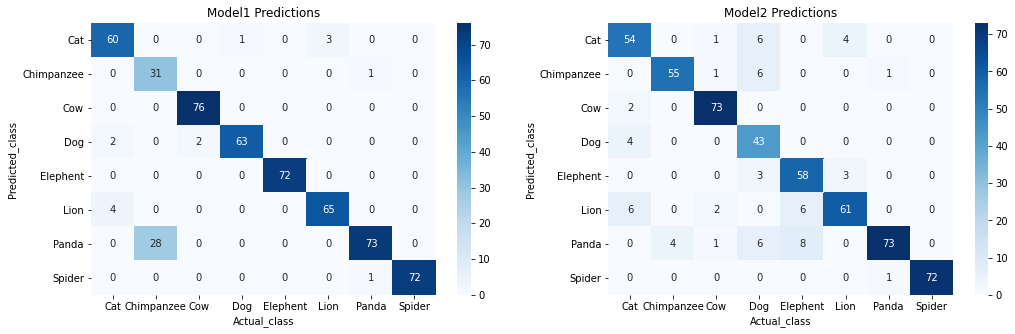

In [17]:
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_m1, annot=True, cmap='Blues')
ax1.set_title("Model1 Predictions")
ax2 = plt.subplot(122)
sns.heatmap(confusion_m2, annot=True, cmap='Blues')
ax2.set_title("Model2 Predictions")

In [18]:
np.diag(confusion_m1)

array([60, 31, 76, 63, 72, 65, 73, 72], dtype=int64)

In [19]:
np.diag(confusion_m2)

array([54, 55, 73, 43, 58, 61, 73, 72], dtype=int64)

In [20]:
np.diag(confusion_m1).sum() # all diagonal

512

In [22]:
confusion_m1.sum().sum() # all answer (Total)

554

In [23]:
acc1 = np.diag(confusion_m1).sum() / confusion_m1.sum().sum()
acc1

0.924187725631769

In [24]:
acc2 = np.diag(confusion_m2).sum() / confusion_m2.sum().sum()
acc2

0.8826714801444043

In [34]:
TP = confusion_m1.iloc[0,0]
FP = confusion_m1.iloc[0,:].sum() - TP
TN = confusion_m1.iloc[1:,1:].sum().sum()
FN = confusion_m1.iloc[:,0].sum() - TP

In [36]:
print("True Positive:", TP)
print("False Positive:", FP)
print("True Negative:", TN)
print("False Negative:", FN)

True Positive: 60
False Positive: 4
True Negative: 484
False Negative: 6


In [32]:
confusion_m1.iloc[1:,1:].sum().sum()

484

In [44]:
Accuracy = (TP+TN) / confusion_m1.sum().sum()
Accuracy

0.9819494584837545

In [41]:
Precision = TP/(TP+FP)
Precision

0.9375

In [42]:
Recall = TP / (TP+FN)
Recall

0.9090909090909091

In [45]:
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
F1_Score

0.923076923076923

In [48]:
for i in range(confusion_m1.shape[0]):
    TP = confusion_m1.iloc[i,i]
    FP = confusion_m1.iloc[i,:].sum() - TP
    FN = confusion_m1.iloc[:,i].sum() - TP
    TN = confusion_m1.sum().sum() - TP - FP - FN
    Accuracy = (TP+TN) / confusion_m1.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP / (TP+FN)
    F1_Score = (2 * Precision * Recall) / (Precision + Recall)
    print(confusion_m1.index[i], '\nAccuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF1_Score:', F1_Score, '\n=========\n')

Cat 
Accuracy: 0.9819494584837545 
Precision: 0.9375 
Recall: 0.9090909090909091 
F1_Score: 0.923076923076923 

Chimpanzee 
Accuracy: 0.9476534296028881 
Precision: 0.96875 
Recall: 0.5254237288135594 
F1_Score: 0.6813186813186813 

Cow 
Accuracy: 0.9963898916967509 
Precision: 1.0 
Recall: 0.9743589743589743 
F1_Score: 0.9870129870129869 

Dog 
Accuracy: 0.9909747292418772 
Precision: 0.9402985074626866 
Recall: 0.984375 
F1_Score: 0.9618320610687023 

Elephent 
Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F1_Score: 1.0 

Lion 
Accuracy: 0.9873646209386282 
Precision: 0.9420289855072463 
Recall: 0.9558823529411765 
F1_Score: 0.9489051094890512 

Panda 
Accuracy: 0.9458483754512635 
Precision: 0.7227722772277227 
Recall: 0.9733333333333334 
F1_Score: 0.8295454545454545 

Spider 
Accuracy: 0.9981949458483754 
Precision: 0.9863013698630136 
Recall: 1.0 
F1_Score: 0.993103448275862 



## Using libraries

In [49]:
from sklearn.metrics import classification_report

In [52]:
pd.DataFrame(classification_report(model1_predict.Actual_class, model1_predict.Predicted_class, output_dict=True)).T

,precision,recall,f1-score,support
Cat,0.937500,0.909091,0.923077,66.000000
Chimpanzee,0.968750,0.525424,0.681319,59.000000
Cow,1.000000,0.974359,0.987013,78.000000
Dog,0.940299,0.984375,0.961832,64.000000
Elephent,1.000000,1.000000,1.000000,72.000000
Lion,0.942029,0.955882,0.948905,68.000000
Panda,0.722772,0.973333,0.829545,75.000000
Spider,0.986301,1.000000,0.993103,72.000000
accuracy,0.924188,0.924188,0.924188,0.924188
macro avg,0.937206,0.915308,0.915599,554.000000


In [53]:
pd.DataFrame(classification_report(model2_predict.Actual_class, model2_predict.Predicted_class, output_dict=True)).T

,precision,recall,f1-score,support
Cat,0.830769,0.818182,0.824427,66.000000
Chimpanzee,0.873016,0.932203,0.901639,59.000000
Cow,0.973333,0.935897,0.954248,78.000000
Dog,0.914894,0.671875,0.774775,64.000000
Elephent,0.906250,0.805556,0.852941,72.000000
Lion,0.813333,0.897059,0.853147,68.000000
Panda,0.793478,0.973333,0.874251,75.000000
Spider,0.986301,1.000000,0.993103,72.000000
accuracy,0.882671,0.882671,0.882671,0.882671
macro avg,0.886422,0.879263,0.878567,554.000000
